In [5]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 数据加载，除去name和ID,保留所有特征列
data = pd.read_csv('D:/d/Zhuangwenjia D/试验报告/学习/python视频/数据分析训练营-结营考试/ProjectC/CarPrice_Assignment.csv')
train_x = data.drop(['CarName','car_ID'],axis=1)
pd.options.display.max_columns=100
#检查各列有没有空值
print(train_x.isnull().any())


# LabelEncoder将非数字特征列转化为数字
#从数据预处理库中载入对离散分类值进行编码的函数
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ["fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem"]
for col in columns:
    train_x[col] = le.fit_transform(train_x[col])


# 所有特征规范化到 [0,1] 空间
min_max_scaler=preprocessing.MinMaxScaler()
train_x = min_max_scaler.fit_transform(train_x)
print(train_x)

symboling           False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool
[[1.         1.         0.         ... 0.22222222 0.28947368 0.20795889]
 [1.         1.         0.         ... 0.22222222 0.28947368 0.28255797]
 [0.6        1.         0.         ... 0.16666667 0.26315789 0.28255797]
 ...
 [0.2        1.         0.         ... 0.13888889 0.18421053 0.40631051]
 [0.2        0.         1.         ... 0.36111111 0.28947368 0.4307

[267.45043848798235, 199.3781156723902, 163.5043203455789, 137.62909333514733, 114.94310957728499, 101.95681880918093, 93.54131126878929, 86.06098616691892, 78.99613808709745, 73.5850584601618, 71.7053452951553, 64.73668071770926, 63.37464413780856, 60.025332127971154, 57.918226118818104, 55.218458856475124, 53.03836543702076, 52.044581551601254, 50.00326481728891, 48.05326760164182, 45.59994803659343, 45.19644890953835, 42.44707341933132, 42.01154611403459, 41.25246195814988, 39.062761324492556, 37.66461920889398, 37.15646560326735, 36.290324133753586, 35.39664829096071, 33.1798460589763, 32.29403239733685, 31.69109410647499, 30.93345337758187, 29.9014039750135, 28.9618924169634, 28.366076802013602, 28.07004080551824, 26.291198702245588, 25.46755450537991, 25.82558457720269, 24.78436800413094, 23.717873580291148, 23.062468121880272, 22.44015415790009, 21.96000409767734, 21.103859539985194, 20.80271651622371, 20.26576171952113]


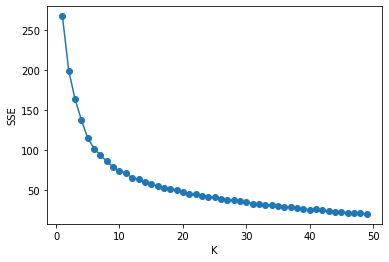

In [6]:
# K-Means 手肘法：统计不同K取值的误差平方和。最有效值在k=10附近
# 但目的是选竞品，如果分10类，一类就有近20辆车，竞品太多。

sse = []
for k in range(1, 50):
	# kmeans算法
	kmeans = KMeans(n_clusters=k)
	kmeans.fit(train_x)
	# 计算inertia簇内误差平方和
	sse.append(kmeans.inertia_)
print(sse)
x = range(1, 50)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x, sse, 'o-')
plt.show()

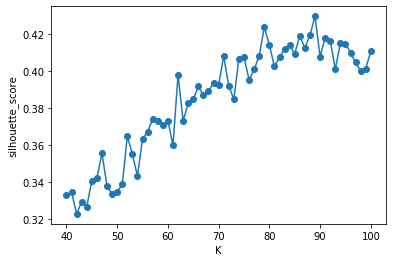

In [97]:
#一般一辆车竞品会选3到4辆车，加上自身，一个类里如果有5辆车，K约为40。最少是一辆竞品车，K约为100
#在K取（40，100）范围内，用轮廓系数法求最优化的K值,结果K=89结果最优
#提个问题，为什么我每次运行程序得到的最优值K都不同，是因为中心点随机的原因吗？是不是意味着我用kmeans对数据分组，其分类结果不唯一。
from sklearn import metrics
scor = []

for k in range(40, 101):
    kmeans = KMeans(n_clusters=k,init='k-means++',n_init=10,max_iter=500)
    kmeans.fit(train_x)
    scor.append(metrics.silhouette_score(train_x, kmeans.labels_,metric='euclidean'))
                   
plt.plot(range(40,101),scor,marker='o')
plt.xlabel('K')
plt.ylabel('silhouette_score')
plt.show()

In [107]:
#用K=89对车型进行Kmeans聚类分析
kmeans = KMeans(n_clusters=89)
#训练数据
kmeans.fit(train_x)
#预测
predict_y = kmeans.predict(train_x)
# 合并聚类结果，插入到原数据中
car_cluster = pd.concat((data,pd.DataFrame(predict_y)),axis=1)
#原来新的这列名字是0，现在改为聚类结果
car_cluster.rename({0:u'聚类结果'},axis=1,inplace=True)
#print(car_cluster )
# 将分类结果导出到CSV文件中
car_cluster.to_csv("D:/d/Zhuangwenjia D/试验报告/学习/python视频/数据分析训练营-结营考试/3.csv",index=False, encoding='GBK')

In [118]:
#Volkswagen车型竞品输出
list = []
result = []
#定位CarName列中含有VW字符的记录，打印其聚类结果
list = car_cluster.loc[car_cluster['CarName'].str.contains('volkswagen')]
print("VW品牌聚类结果")
print(list['聚类结果'])
print("-------------------------------------------------")
print("VW竞品")
#将VW聚类结果中的重复值去除，查找其他车型中聚类结果和VW品牌相同的记录，将其CarName和聚类结果添加到result列表
for i in set(list['聚类结果']):
    result.append(car_cluster[car_cluster['聚类结果'] == i][['CarName','聚类结果']]) 
#按各类输出竞品
for v in range(0,7):
    print(result[v])


VW品牌聚类结果
183    32
184     8
185    24
186    24
187    67
188    24
191    49
192    23
193    86
Name: 聚类结果, dtype: int32
-------------------------------------------------
VW竞品
                          CarName  聚类结果
5                        audi fox    32
132                      saab 99e    32
183  volkswagen 1131 deluxe sedan    32
                     CarName  聚类结果
187  volkswagen super beetle    67
                  CarName  聚类结果
184  volkswagen model 111     8
                  CarName  聚类结果
41            honda civic    49
88   mitsubishi mirage g4    49
191     volkswagen rabbit    49
               CarName  聚类结果
130       renault 12tl    86
193  volkswagen dasher    86
                      CarName  聚类结果
174          toyota celica gt    23
192  volkswagen rabbit custom    23
                 CarName  聚类结果
3            audi 100 ls    24
185    volkswagen type 3    24
186  volkswagen 411 (sw)    24
188    volkswagen dasher    24
